In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris_dataset = load_iris() #scikit-learn에 있는 iris 데이터 불러오기

In [2]:
print(iris_dataset['DESCR']) #데이터 설명
# sepal : 꽃잎
# petal : 꽃받침

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
print(type(iris_dataset))
iris_dataset.keys()

<class 'sklearn.utils.Bunch'>


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
iris_dataset['data'].shape
#4개열, 150행
print(iris_dataset['feature_names'])
#각각 꽃잎 길이, 꽃잎 폭, 꽃받침 길이, 꽃받침 폭
print(iris_dataset['target'])
print(iris_dataset['target_names'])
#정답 레이블들 (0 =  setosa, 1 = versicolor, 2 = virginica)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=1212, test_size=0.3)

In [6]:
print(X_train.shape)
print(X_test.shape)

(105, 4)
(45, 4)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f74e104bed0>,
      dtype=object)

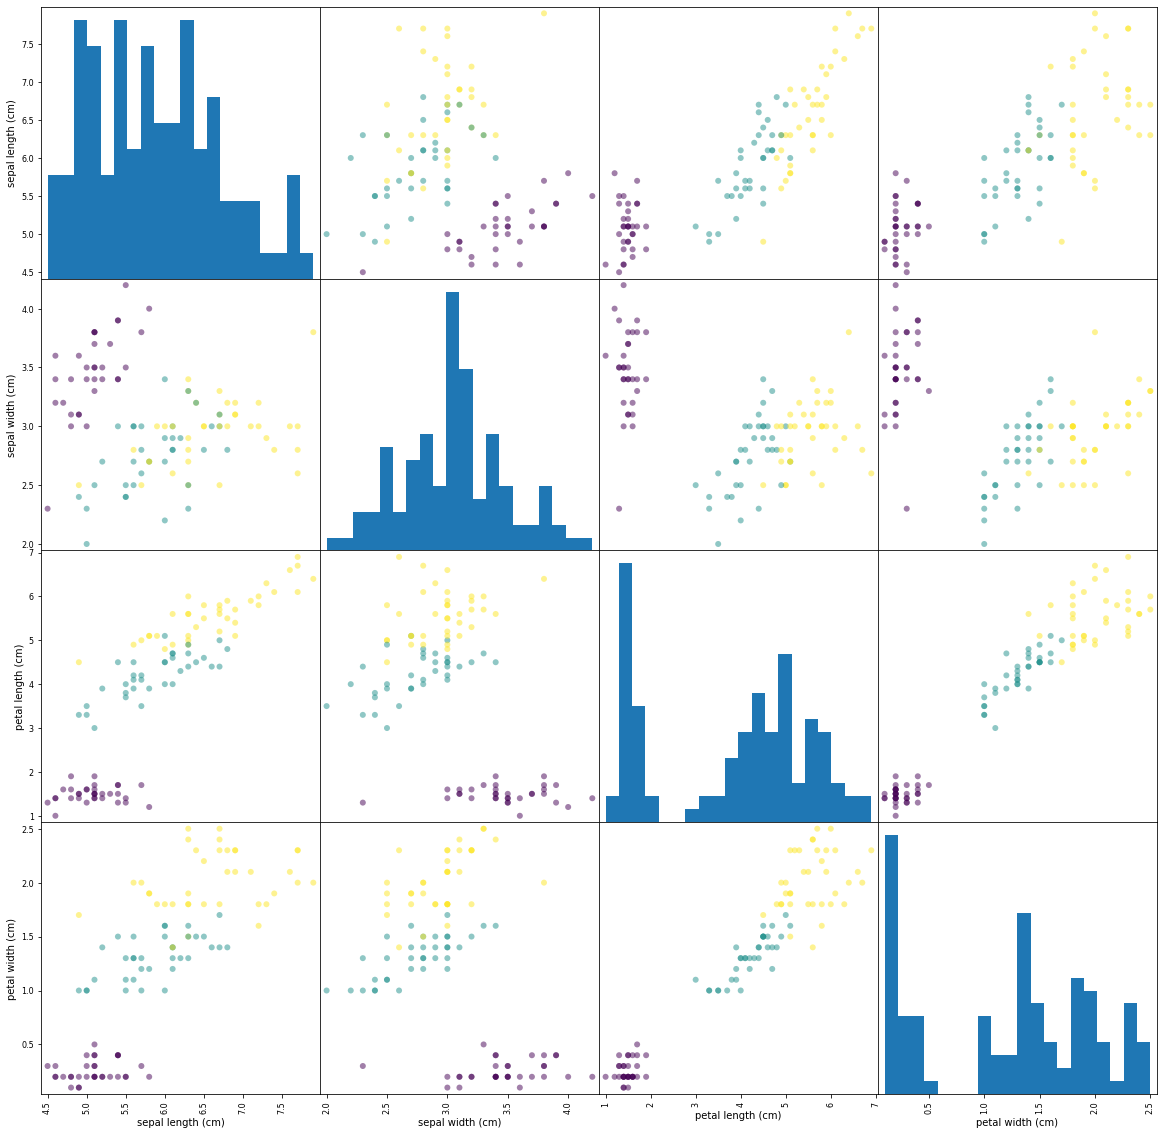

In [7]:
import pandas as pd
iris_df = pd.DataFrame(X_train, columns=iris_dataset['feature_names'])
pd.plotting.scatter_matrix(iris_df, c=Y_train, marker='o', hist_kwds={'bins':20}, figsize=(20, 20))

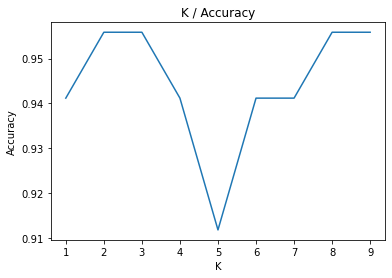

0 - 10까지가 적정, 근데 분포를 보면 3으로 하는게 나을듯?


In [26]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from random import randint

# 데이터를 랜덤하게 섞어서, K에 따라서 정확도가 어떻게 달라지는지 평균값을 구함

X_train, X_test, Y_train, Y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=randint(1, 100), test_size=0.45)

X = [i for i in range(1, 10)]
Y_total = []

TRIES = 30
for tries in range(1, TRIES + 1):
    Y = []
    for K in range(1, 10):
        knn = KNeighborsClassifier(n_neighbors = K)
        knn.fit(X_train, Y_train)
        Y_pred = knn.predict(X_test)
        accuracy = np.mean(Y_pred == Y_test)
        Y.append(accuracy)
    Y_total = [Y[i] + Y_total[i] for i in range(len(Y_total))]
    

Y_total = [elem / TRIES for elem in Y_total]
    
plt.plot(X, Y)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('K / Accuracy')
plt.show()

print('0 - 10까지가 적정, 근데 분포를 보면 3으로 하는게 나을듯?')